In [47]:
from numpy import *
import jupyter as jp
import matplotlib.pyplot as plt
from sklearn import datasets as ds
from sklearn import model_selection as ms
from sklearn.metrics import classification_report


def load_data(): #加载数据
    dataset = ds.load_svmlight_file("dataset\\a9a.txt",n_features=123)
    return dataset[0],dataset[1]


def gradient_descent(X_train,X_val,y_train,y_val,w,alpha,loop_num,C): #C为超参数
    losses_train=[]
    losses_val=[]
    for epoch in range(loop_num):
        h = 1 - y_train * dot(X_train, w)
        y_hat = where(h > 0, y_train, 0)
        w -= alpha * (w - C * dot(X_train.transpose(), y_hat))

        y_predict_train = where(dot(X_train, w) > 0, 1, -1)
        loss_train = sum(w * w) + C * sum(maximum(1 - y_train * dot(X_train, w), 0))
        losses_train.append(loss_train / y_train.size)

        y_predict_val = where( dot(X_val, w) > 0, 1, -1)
        loss_val = sum(w * w) + C * sum(maximum(1 - y_val * dot(X_val, w), 0))
        losses_val.append(loss_val/y_val.size)

    return w,losses_train,losses_val


X,y=load_data()
X_train,X_test,y_train,y_test=ms.train_test_split(X,y,test_size=0.3,random_state=0)

X_train=X_train.toarray()
X_test=X_test.toarray()
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

col_train=ones(X_train.shape[0])
col_test=ones(X_test.shape[0])

X_train=c_[col_train,X_train]
X_test=c_[col_test,X_test]

init_W = random.random((X.shape[1] + 1, 1)) #初始化W

W,loss_train,loss_test = gradient_descent(X_train,X_test,y_train,y_test,init_W,alpha=0.00001,loop_num=100,C=0.5)

In [48]:
print(classification_report(y_test, where(dot(X_test, W) > 0, 1, -1),
                            target_names=["positive", "negative"], digits=4))


              precision    recall  f1-score   support

    positive     0.8424    0.9050    0.8726      7407
    negative     0.6115    0.4691    0.5309      2362

   micro avg     0.7996    0.7996    0.7996      9769
   macro avg     0.7269    0.6870    0.7017      9769
weighted avg     0.7866    0.7996    0.7900      9769



Text(0.5, 1.0, 'The graph of loss value varing with the number of iterations')

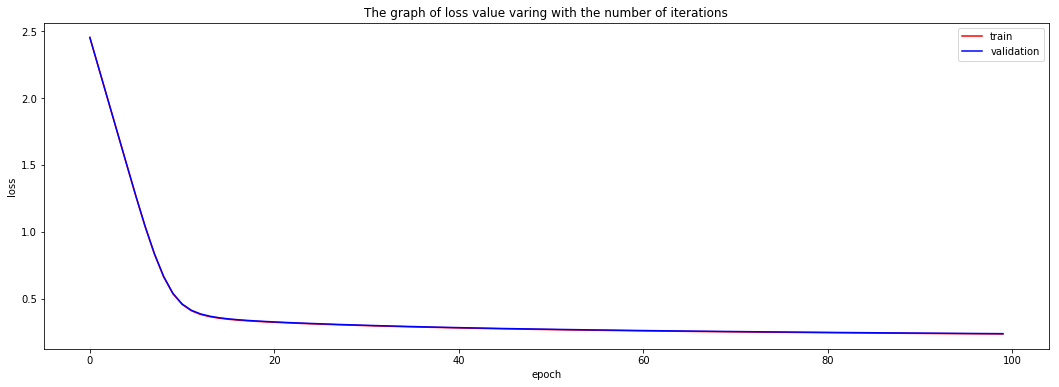

In [49]:
%matplotlib inline

plt.figure(figsize=(18, 6))
plt.plot(loss_train, color="r", label="train")
plt.plot(loss_test, color="b", label="validation")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("The graph of loss value varing with the number of iterations")